<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
       <img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
    </div>
</div>

<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;">22.501 · Fundamentos de Programación</p>
    <p style="margin: 0; text-align:right;">Grado en Ciencia de Datos Aplicada</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>

</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

Fundamentos de Programación
============================

--- 

Unidad 7: Análisis de datos en Python
-----------------------------------------------------

---

### Instrucciones de uso

Este documento es un *notebook* interactivo que intercala explicaciones más bien teóricas de conceptos de programación con fragmentos de código ejecutables. Para aprovechar las ventajas que aporta este formato, se recomienda, en primer lugar, leer las explicaciones y el código que os proporcionamos. De esta manera tendréis un primer contacto con los conceptos que exponemos. Ahora bien, **¡la lectura es sólo el principio!** Una vez hayáis leído el contenido, no olvidéis ejecutar el código proporcionado y modificarlo para crear variantes que os permitan comprobar que habéis entendido su funcionalidad y explorar los detalles de implementación. Por último, se recomienda también consultar la documentación enlazada para explorar con más profundidad las funcionalidades de los módulos presentados.

Para guardar posibles modificaciones que hagáis sobre este notebook, os aconsejamos que montéis la unidad de Drive en Google Colaboratory (colab). Tenéis que ejecutar las instrucciones siguientes:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/prog_datasci_7

### Introducción

Esta unidad muestra cómo implementar algunas de las técnicas más populares de análisis de datos en Python. En primer lugar, se presenta un análisis exploratorio básica de un conjunto de datos. A continuación, veremos cómo reducir la dimensionalidad del conjunto de datos, utilizando PCA. Después, implementaremos un clasificador y un método de clustering de datos, y visualizaremos los resultados. Finalmente, veremos cómo validar el modelo aprendido utilizando la librería sklearn.

A continuación se incluye la tabla de contenidos, que podéis utilizar para navegar por el documento:

<ul style = "list-style-type: none">
    <li> <a href='#1-Introduccion'> 1 Introducción </a> </li>
    <li> <a href="#2-Una-pequeña-introduccion-al-aprendizaje-automatico"> 2 Una pequeña introducción al aprendizaje automático </a> </li>
    <ul style = "list-style-type: none">
        <li> <a href="#2.1-Validacion-cruzada"> 2.1 Validación cruzada </a> </li>
        <li> <a href="#2.2-El-conjunto-de-datos-de-flores-de-Iris"> 2.2 El conjunto de datos de flores de Iris </a> </li>
    </ul>
    <li> <a href='#3-Analisis-exploratorio-de-datos'> 3 Análisis exploratorio de datos </a> </li>
    <li> <a href="#4-Reduccion-de-la-dimensionalidad-del-dataset"> 4 Reducción de la dimensionalidad del dataset </a> </li>
    <li> <a href="#5-Clasificacion"> 5 Clasificación </a> </li>
    <li> <a href="#6-Clustering"> 6 Clustering </a> </li>
    <li> <a href="#7-Validacion-del-modelo"> 7 Validación del modelo </a> </li>
    <li> <a href="#8-Ejercicios-y-preguntas-teoricas"> 8 Ejercicios y preguntas teóricas </a> </li>
    <ul style = "list-style-type: none">
        <li> <a href="#8.1-Instrucciones-importantes"> 8.1 Instrucciones importantes </a> </li>
    </ul>
    <li> <a href="#9-Bibliografía"> 9 Bibliografía </a> </li>
</ul>

<a id='1-Introduccion'></a>
# 1 Introducción

El análisis de datos y la extracción de información y patrones a partir de estos datos, lo que se conoce como minería de datos, se está convirtiendo en pieza clave en muchos segmentos de la economía: desde ofrecer determinados descuentos a clientes de un supermercado en base a sus preferencias de consumo (adquiridas a través de un programa de fidelización por puntos, por ejemplo), hasta la clasificación automática de imágenes en cualquier red social.

En este módulo trabajaremos con librerías que ya hemos presentado en los módulos anteriores ([NumPy](http://www.numpy.org/), [pandas](http://pandas.pydata.org/) y [scikit-learn](http://scikit-learn.org)). Como en el módulo anterior, es importante destacar que se han seleccionado únicamente algunas técnicas pero, en la práctica, el conjunto de técnicas que se aplican para el análisis de datos es mucho más amplio. Además, para la mayoría de ejemplos usaremos las configuraciones por defecto incorporadas en las librerías, pero algunas de las funciones que probaremos tienen multitud de parámetros que podemos ajustar.

<a id='2-Una-pequeña-introduccion-al-aprendizaje-automatico'></a>
# 2 Una pequeña introducción al aprendizaje automático

El aprendizaje automático (más conocido por su denominación en inglés, _Machine Learning_ o ML) es la rama de la inteligencia artificial que engloba el conjunto de técnicas que permiten que los ordenadores aprendan, es decir, que sean capaces de desarrollar comportamientos para los cuales no han estado explícitamente programados. En los últimos años, el aprendizaje automático ha sido aplicado con éxito a multitud de problemas, haciendo que hoy en día usemos este tipo de sistemas a diario, a veces sin ni siquiera ser conscientes de ello. 

En el problema del aprendizaje se considera una muestra de n observaciones y, a partir de estas, se intentan predecir propiedades de datos desconocidos. Cuando trabajamos con datos multidimensionales, hablamos de cada uno de sus atributos como características (en inglés features). Volviendo al ejemplo del programa de descuentos a clientes en un supermercado, podríamos entender la muestra como el número de clientes que tienen una tarjeta de puntos (y la han usado en alguna ocasión). Para cada uno de estos clientes, tenemos ciertos datos que hemos podido guardar: número de bebidas gaseosas compradas, número de alimentos de origen vegetal, animal, etc. Estos datos que caracterizan a un determinado cliente es lo que entenderíamos como atributos. A partir de estos atributos, quizá estaríamos interesados en analizar el consumo de alimentos de origen vegetal y no animal de los clientes y entonces ofrecerles determinados descuentos en productos de origen «bio», por ejemplo, y aumentar la factura mensual de estos productos en la cadena de supermercados.

Principalmente, distinguimos dos categorías de algoritmos de aprendizaje automático: **supervisado** y **sin supervisión**.

En el aprendizaje automático supervisado, los datos contienen ciertos atributos que queremos predecir. Bien podemos clasificar los datos en diferentes categorías (**clasificación**) o quizá nos interese predecir una variable continua en base a los atributos conocidos (**regresión**).

Un ejemplo de clasificación podría ser, mediante un texto escaneado, asignar a cada carácter encontrado una letra ([reconocimiento de escritura](https://es.wikipedia.org/wiki/Reconocimiento_%C3%B3ptico_de_caracteres), un problema clásico). En cuanto a un ejemplo de regresión, podríamos querer predecir la edad de un perro en base a su peso, altura y color y longitud del pelo.

En el aprendizaje automático sin supervisión el objetivo es descubrir nuevas propiedades de los datos de entrada, ya sea agrupándolos por propiedades similares (_**clustering**_), descubriendo la distribución que siguen (**estimación de la densidad**) o bien proyectando los datos en menos o más dimensiones ([PCA](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales), visualización, etc.)

Sobre _clustering_, existen muchos casos prácticos como por ejemplo la agrupación de proteínas en base a su peso atómico o bien la segmentación de clientes en un supermercado.



<a id='2.1-Validacion-cruzada'></a>
## 2.1 Validación cruzada

En ocasiones el resultado del aprendizaje automático es un modelo que representa el conjunto de datos y que nos servirá para predecir alguna característica. Una de las técnicas que permiten evaluar la capacidad de generalización del modelo aprendido es la **validación cruzada**. Una ronda de validación cruzada consiste en la separación del conjunto de muestras disponibles en dos subconjuntos disjuntos, el conjunto de **aprendizaje** y el conjunto de **validación** o test. El conjunto de muestras de aprendizaje se utiliza para entrenar el modelo, mientras que el conjunto de validación se utiliza para evaluar el modelo. Algunas técnicas de validación cruzada realizan varias rondas (con diferentes particiones de los datos).

Separar las muestras de este modo permite evitar problemas como el overfitting, comparar la capacidad de predicción de diferentes técnicas, realizar una selección de características, entre otras aplicaciones. 

<a id='2.2-El-conjunto-de-datos-de-flores-de-Iris'></a>
## 2.2 El conjunto de datos de flores de Iris

En esta unidad vamos a trabajar con un conjunto de datos clásico: el conjunto de datos de **flores Iris**. En el artículo de [Ronald Fisher](https://es.wikipedia.org/wiki/Ronald_Fisher) de 1936 titulado The use of multiple measurements in taxonomic problems, se recopilaron para tres clases de flores Iris relacionadas (Iris setosa, Iris virginica e Iris versicolor) cuatro atributos: longitud y anchura de sépalos y pétalos en cm ([anatomía de una flor](https://es.wikipedia.org/wiki/P%C3%A9talo)). Para cada tipo de Iris, se seleccionaron 50 flores, por lo que tenemos un tamaño de observaciones de 50 x 3 x 4 (número de flores x clases de flores x atributos medidos). A continuación tenéis un resumen de las distintas características agrupadas por tipo de flor (rojo para setosa, verde para versicolor, azul para virginica):

![](img/iris_data_set.png)

Fuente: Anderson's Iris data set d'Indon. Disponible bajo licencia CC BY-SA 3.0 via Wikimedia Commons

Para empezar, cargamos el conjunto de datos de flores de iris:

In [ ]:
from sklearn import datasets

# Cargamos el dataset de iris:
iris = datasets.load_iris()

<a id='3-Analisis-exploratorio-de-datos'></a>
# 3 Análisis exploratorio de datos

En primer lugar, observaremos las características principales de los datos que utilizaremos en este Notebook. Conocer los datos con los que trabajaremos nos ayudará después en la creación de modelos y la validación de hipótesis.

Podemos echar un vistazo a la descripción del *dataset*:

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

En el conjunto Iris que acabamos de cargar, los datos están organizados de la siguiente forma: cada fila es una muestra y por cada muestra, las columnas (las características) son: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.

Representar visualmente los datos también nos permite realizar una primera aproximación a los mismos. Vamos a generar un _scatter plot_ con los dos primeros atributos.

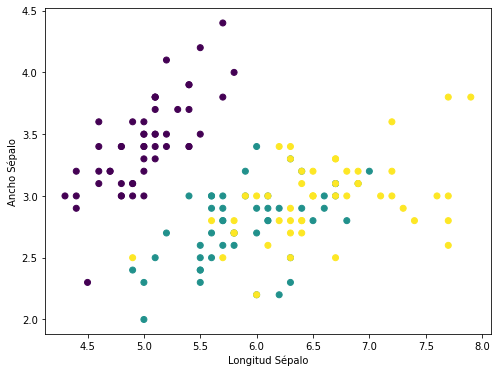

In [ ]:
%matplotlib inline

# Importamos las librerías.
import matplotlib.pyplot as plt
from sklearn import datasets

# Importamos el dataset.
iris = datasets.load_iris()

# Seleccionamos solo los dos primeros atributos.
X = iris.data[:, :2]
Y = iris.target

# Creamos la figura.
plt.figure(1, figsize=(8, 6))
plt.clf()

# Coloreamos utilizando la categoría.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel(u'Longitud Sépalo')
_ = plt.ylabel(u'Ancho Sépalo')


Después, creamos un _box plot_ que resume los datos de todos los atributos disponibles.

In [ ]:
# Cargamos los datos en un dataframe de pandas.
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)

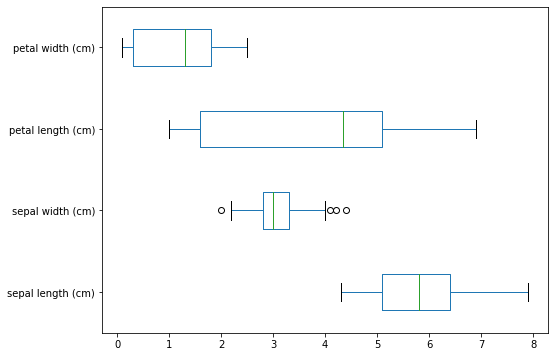

In [ ]:
# Mostramos un box plot con los 4 atributos.
_ = df.plot.box(vert=False, figsize=(8, 6))

Finalmente, mostramos histogramas para los valores de cada atributo.

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

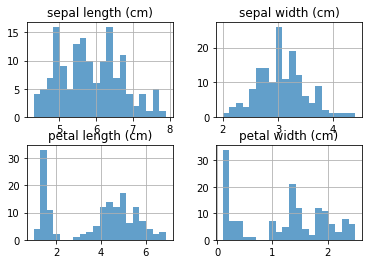

In [ ]:
# Generamos los histogramas.
df.hist(alpha=0.7, bins=20)

<a id='4-Reduccion-de-la-dimensionalidad-del-dataset'></a>
# 4 Reducción de la dimensionalidad del dataset

Con el fin de manejar **la dimensionalidad** y evitar problemas como el sobre-ajuste, se utilizan métodos como el Análisis del Componente Principal (**Principal Component Analysis** o **PCA**). El PCA es un método que se utiliza para reducir el número de variables de los datos mediante la transformación y extracción de una muestra de datos relevante. De este modo se reduce la dimensión de los datos con el objetivo de retener la máxima información posible. En otras palabras, este método combina variables altamente correlacionadas para formar un número más reducido de un conjunto artificial de variables que se llaman "componentes principales" que explican la mayor parte de la variabilidad de los datos.

Por poner un ejemplo, consideraremos que queremos reducir la dimensionalidad del siguiente dataset de dos dimensiones:

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

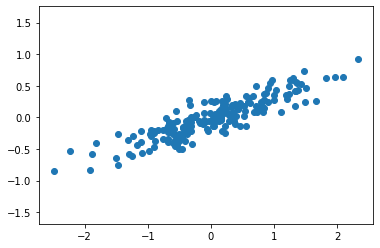

In [ ]:
# Importem les llibreries:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

A ojo, parece que hay una fuerte relación lineal entre las variables x (eje horizontal) e y (eje vertical). El PCA tiene el objetivo de encontrar la relación entre x e y de forma no supervisada. Esto lo consigue buscando una lista de los ejes principales de los datos y utilizando estos ejes para describir el conjunto de datos. Con el estimador de PCA de skearn, podemos calcularlo de la siguiente manera:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

# Con la función fit() podemos calcular los "componentes principales" y "variación explicada" para cada uno:
print('Los componentes del PCA son :\n ' + str(pca.components_)+ '\n')

print('La variabilidad explicada por los componentes es:\n ' + str(pca.explained_variance_))


Los componentes del PCA son :
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]

La variabilidad explicada por los componentes es:
 [0.7625315 0.0184779]


In [ ]:
sum(pca.explained_variance_)

0.7810093963961741

Pero qué significan estos números? A continuación visualizamos cómo a vectores sobre los datos de entrada, utilizando los **componentes** para definir la dirección del vector y la **varianza explicada** para definir la longitud cuadrada del vector:

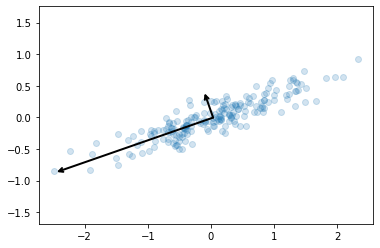

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# muestra los datos
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Estos vectores representan los ejes principales de los datos, aquellos que **explican la mayor parte de la variabilidad de los datos**. En este caso vemos que el eje más relevante para resumir los datos es el más horizontal (apuntando a las 8 de un reloj), después lo complementa el eje más vertical (apuntando a las 11 de un reloj). Como son complementarios, su dirección es siempre ortogonal. Es por esta razón que tendremos un máximo de tantos componentes como dimensiones tenga el dataset con los que trabajamos. La longitud del vector indicacin la importancia que tiene este eje en la descripción de la distribución de los datos; más precisamente, es una medida de la varianza de los datos en el eje.
En este caso, hemos partido de una dataset de 2 dimensiones, la x y la y. Si vulguesim reducir su dimensionalidad a una sola variable sabríamos que tenemos que transformar los datos projectatnt-las al eje más relevante, lo que corresponde con el componente principal, en este caso sabemos que sería el eje más horizontal.

<a id='5-Clasificacion'></a>
# 5 Clasificación

Existen múltiples algoritmos de clasificación. Veamos un ejemplo de cómo usar un clasificador _k nearest neighbors_ para predecir el tipo de especies de iris.

In [ ]:
# Importamos el clasificador KNeighborsClassifier de la librería sklearn.
from sklearn.neighbors import KNeighborsClassifier
# Importamos NumPy.
import numpy as np

# Seleccionamos las dos primeras características (usaremos únicamente dos características para
# poder representar gráficamente los resultados en 2D).
X = iris.data[:, :2]
y = iris.target

# Separamos los datos (de manera aleatoria) en dos subconjuntos: el de aprendizaje y el de test.
indices = np.random.permutation(len(iris.data))
iris_X_train = X[indices[:-10]]
iris_y_train = y[indices[:-10]]
iris_X_test  = X[indices[-10:]]
iris_y_test  = y[indices[-10:]]

# Creamos el clasificador.
knn = KNeighborsClassifier()

# Entrenamos el clasificador.
knn.fit(iris_X_train, iris_y_train) 

# Probamos el clasificador.
iris_y_test_predicted = knn.predict(iris_X_test)

# Mostramos los resultados de la predicción sobre el conjunto de test.
print("Clases reales: \t\t" + str(iris_y_test))
print("Clases predichas: \t" + str(iris_y_test_predicted))
print("Accuracy: \t\t" + str(knn.score(iris_X_test, iris_y_test)))

Clases reales: 		[2 2 2 1 1 1 0 1 2 0]
Clases predichas: 	[2 2 2 2 1 2 0 1 1 0]
Accuracy: 		0.7


Podemos visualizar gráficamente el clasificador aprendido:

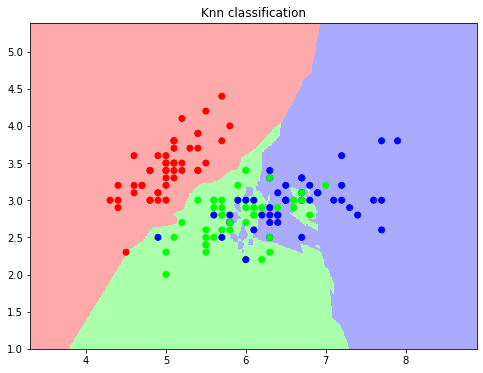

In [ ]:
%matplotlib inline

# Importamos la librería.
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Creamos los mapas de colores que usaremos para la representación.
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Calculamos los límites de la visualización.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Realizamos la predicción.
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Mostramos el resultado en una figura.
plt.figure(1, figsize=(8, 6))
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Mostramos las muestras utilizadas en el aprendizaje.
plt.scatter(iris_X_train[:, 0], iris_X_train[:, 1], c=iris_y_train, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Knn classification")

plt.show()

<a id='6-Clustering'></a>
# 6 Clústering

Como con los algoritmos de clasificación, actualmente existen multitud de algoritmos de clústering. Veámos un ejemplo de utilización del algoritmo *k-means*.

En primer lugar, generamos una visualización del conjunto de muestras. A continuación tenéis un código de ejemplo en el que representamos la taxonomía de las diferentes muestras (coloreamos por clase de Iris) dependiendo de la longitud del sépalo (columna 0), ancho del sépalo (columna 1) y longitud del pétalo (columna 2):

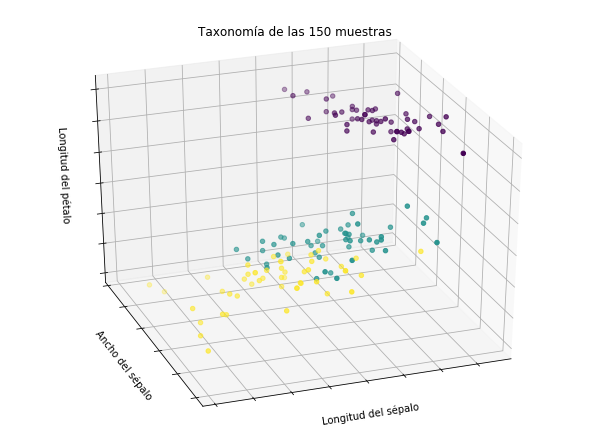

In [ ]:
%matplotlib inline

# Cargamos las librerías necesarias.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# Cargamos el dataset.
iris = datasets.load_iris()
# Datos de la muestra
X_iris = iris.data
# Categorías de la muestra (tres tipos de iris)
Y_iris = iris.target

# Creamos una figura.
fig = plt.figure(1, figsize=(8, 6))
# De tipo 3D
ax = Axes3D(fig, elev=-150, azim=110)
# Y representamos los diferentes puntos, coloreando por tipo de Iris
ax.scatter(X_iris[:,[0]], X_iris[:,[1]], X_iris[:,[2]], c=Y_iris)

# Leyendas y títulos
ax.set_title(u"Taxonomía de las 150 muestras")
ax.set_xlabel(u"Longitud del sépalo")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(u"Ancho del sépalo")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(u"Longitud del pétalo")
_ = ax.w_zaxis.set_ticklabels([])

Ahora vamos a hacer el siguiente experimento: utilizando el algoritmo de clústering *k-means*, vamos a colorear utilizando los grupos que calcule el algoritmo y no las clases que ya conocemos:

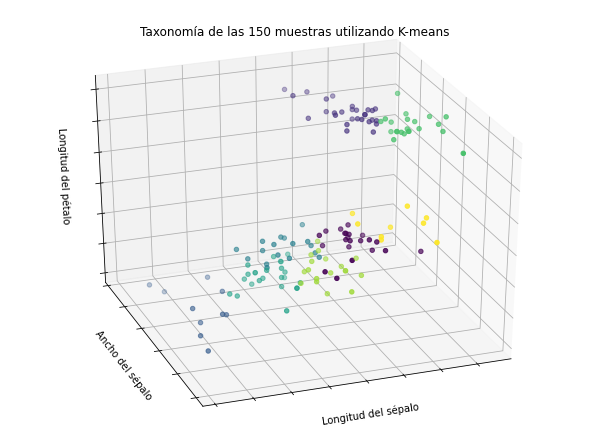

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets

iris = datasets.load_iris()
X_iris = iris.data

# Cargamos el algoritmo K-means y hacemos fit a nuestros datos:
k_means = cluster.KMeans()
k_means.fit(X_iris)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_iris[:,[0]], X_iris[:,[1]], X_iris[:,[2]], c=k_means.labels_)
ax.set_title(u"Taxonomía de las 150 muestras utilizando K-means")
ax.set_xlabel(u"Longitud del sépalo")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(u"Ancho del sépalo")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(u"Longitud del pétalo")
_ = ax.w_zaxis.set_ticklabels([])

¡Notad que en **ningún momento se utiliza la clase de la muestra** (`iris.target`) para entrenar el algoritmo ni para evaluarlo! Ahora estamos utilizando un algoritmo de clústering, que agrupará las muestras en función de las características de las mismas. El resultado del algoritmo es el grupo al que pertenece cada muestra (pero el algoritmo no intenta predecir la clase de la muestra). Los nombres de los grupos generados son arbitrarios (en este caso, valores enteros del 0 al número de grupos - 1). 

Vamos ahora a forzar que el número de clústers sea igual a 3 y vamos a representar el resultado:

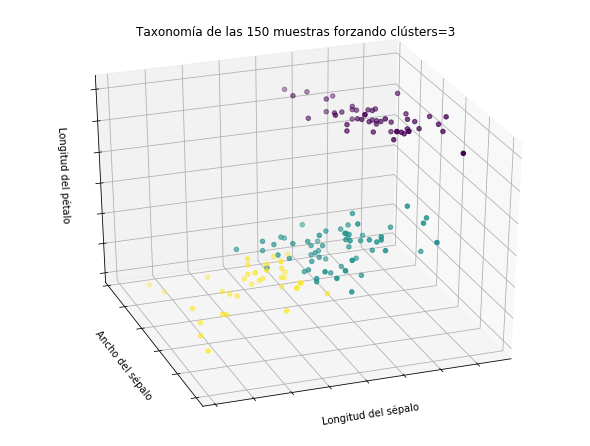

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets

iris = datasets.load_iris()
X_iris = iris.data

# Cargamos el algoritmo K-means y hacemos fit a nuestros datos
# esta vez forzando el número de clústers a tres:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_iris[:,[0]], X_iris[:,[1]], X_iris[:,[2]], c=k_means.labels_)
ax.set_title(u"Taxonomía de las 150 muestras forzando clústers=3")
ax.set_xlabel(u"Longitud del sépalo")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(u"Ancho del sépalo")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(u"Longitud del pétalo")
_ = ax.w_zaxis.set_ticklabels([])

Recordad que utilizando un algoritmo de clústering no aprendemos a qué clase pertenece cada muestra sino que simplemente agrupamos las muestras en grupos (clústers).

<a id='7-Validacion-del-modelo'></a>
# 7 Validación del modelo

Debemos evitar evaluar los modelos con los mismos datos que se han utilizado para el aprendizaje. En el ejemplo de clasificación, hemos separado los datos de manera aleatoria en dos conjuntos, uno para el aprendizaje y uno para el test. Está técnica se conoce como *holdout*. En el ejemplo de la clasificación hemos usado numpy para crear los dos conjuntos. En la unidad 6 vimos cómo realizar este mismo proceso usando las funciones sobre *dataframes* que ofrece la libería pandas. Ahora veremos cómo podemos hacerlo usando sklearn:

In [ ]:
# Importamos la función 'train_test_split'.
from sklearn.model_selection import train_test_split

# Separamos las muestras utilizando un 20 % para test y el resto para aprendizaje.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

print("Total de muestras: " + str(len(iris.data)))
print("Aprendizaje: " + str(len(X_train)), "(" + str(float(len(X_train))/len(iris.data)*100) + "%)")
print("Test: " + str(len(X_test)), "(" + str(float(len(X_test))/len(iris.data)*100) + "%)")

Total de muestras: 150
Aprendizaje: 120 (80.0%)
Test: 30 (20.0%)


También podemos usar otras técnicas para evaluar los modelos, por ejemplo, _kfold_ o _Leave One Out_:

In [ ]:
# Importamos la función KFold.
from sklearn.model_selection import KFold
# Importamos NumPy.
import numpy as np

# Particionamos un conjunto de nueve muestras usando 3-Fold y mostramos el resultado.
X = np.array(range(9))
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (X[train], X[test]))

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
# Importamos la función LeaveOneOut.
from sklearn.model_selection import LeaveOneOut
# Importamos NumPy.
import numpy as np

# Particionamos un conjunto de nueve muestras usando LeaveOneOut y mostramos el resultado.
X = np.array(range(9))
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (X[train], X[test]))

[1 2 3 4 5 6 7 8] [0]
[0 2 3 4 5 6 7 8] [1]
[0 1 3 4 5 6 7 8] [2]
[0 1 2 4 5 6 7 8] [3]
[0 1 2 3 5 6 7 8] [4]
[0 1 2 3 4 6 7 8] [5]
[0 1 2 3 4 5 7 8] [6]
[0 1 2 3 4 5 6 8] [7]
[0 1 2 3 4 5 6 7] [8]


<a id='8-Ejercicios-y-preguntas-teoricas'></a>
# 8 Ejercicios y preguntas teóricas

La parte evaluable de esta unidad consiste en la entrega de un fichero Notebook con extensión «.ipynb» que contendrá los diferentes ejercicios y las preguntas teóricas que hay que contestar. Encontraréis el archivo (`prog_datasci_7_analisis_entrega.ipynb`) con las actividades en la misma carpeta que este notebook que estáis leyendo.

<a id='8.1-Instrucciones-importantes'></a>
## 8.1 Instrucciones importantes

Es muy importante que a la hora de entregar el fichero Notebook con vuestras actividades os aseguréis de que:

1. Vuestras soluciones sean originales. Esperamos no detectar copia directa entre estudiantes.
2. Todo el código esté correctamente documentado. El código sin documentar equivaldrá a un 0.
3. El fichero comprimido que entregáis es correcto (contiene las actividades de la PEC que tenéis que entregar).

Para hacer la entrega, tenéis que ir a la carpeta del drive `Colab Notebooks`, clicando con el botón derecho en la PEC en cuestión y haciendo `Download`. De este modo, os bajaréis la carpeta de la PEC comprimida en `zip`. Este es el archivo que tenéis que subir al campus virtual de la asignatura. 

<a id='9-Bibliogradia'></a>
# 9 Bibliografía

1. Aprendizaje supervisado con sklearn: http://scikit-learn.org/stable/supervised_learning.html
2. Comparación de clasificadores con sklearn: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
3. Aprendizaje no supervisado con sklearn: http://scikit-learn.org/stable/unsupervised_learning.html

# Autores

- Autor original Brian Jiménez Garcia, 2016.
- Actualizado por Cristina Pérez Solà, 2017 y 2019.

<div style="width: 30%; clear: both;">
    <div style="width:0%;">&nbsp;</div>
           <img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-sa.png">
</div>